<a href="https://colab.research.google.com/github/mohib988/ml-project/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# jkljkaldjaklj

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import cufflinks as cf
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import matplotlib.pyplot as plt

from sklearn import preprocessing
%matplotlib inline



<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
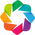

In [5]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.models import HoverTool
from IPython.display import HTML, display

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [62]:

pathfile="/content/drive/MyDrive/AnomalyDetection.csv"
df=pd.read_csv(pathfile)

In [63]:
df.columns

Index(['Unnamed: 0', 'srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date',
       'invoice_no', 'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex'],
      dtype='object')

In [64]:
#HIIIII

In [65]:

df=df.drop("Unnamed: 0",axis=1)

In [66]:
df['created_date_time']=pd.to_datetime(df['created_date_time'])
df['invoice_date']=pd.to_datetime(df['invoice_date'])


In [67]:
df["month"]=pd.DatetimeIndex(df['invoice_date']).month
df["weekday"]=pd.DatetimeIndex(df['invoice_date']).weekday


In [20]:
df[["pos_id","invoice_date","ntn","sales_value","invoice_date","is_active","consider_for_Annex","tariff_code"]]

,pos_id,invoice_date,ntn,sales_value,invoice_date,is_active,consider_for_Annex,tariff_code
0,387,2023-11-16 06:16:42,55,0.000000,2023-11-16 06:16:42,1,1,NaN
1,452,2023-11-16 19:36:35,219,79.650000,2023-11-16 19:36:35,1,1,NaN
2,1015,2023-11-18 02:12:24,3,2399.000000,2023-11-18 02:12:24,1,1,NaN
3,286,2023-11-14 22:14:43,161,1150.439941,2023-11-14 22:14:43,1,1,NaN
4,145,2023-08-05 20:34:58,161,331.859985,2023-08-05 20:34:58,1,1,NaN
...,...,...,...,...,...,...,...,...
9995,643,2023-11-16 20:51:01,90,1221.000000,2023-11-16 20:51:01,1,1,NaN
9996,690,2023-11-19 08:09:00,69,200.000000,2023-11-19 08:09:00,1,1,N / A
9997,145,2023-11-16 16:02:58,161,177.000000,2023-11-16 16:02:58,1,1,NaN
9998,845,2023-11-20 22:06:14,127,655.000000,2023-11-20 22:06:14,1,1,NaN


In [ ]:
def overview(df: pd.DataFrame, timestamp_col: str = None) -> None:
    print('Null Count:\n', df.isnull().sum(),'\n')
    print('Data Types:\n', df.dtypes)

    if timestamp_col is not None:
        print('\nDate Range:\n\nStart:\t',df[timestamp_col].min())
        print('End:\t',df[timestamp_col].max())
        print('Days:\t',(df[timestamp_col].max() - df[timestamp_col].min()))

#Initial Insight

In [ ]:
overview(df, timestamp_col='invoice_date')

Null Count:
 srb_invoice_id            0
pos_id                    0
ntn                       0
name                      0
invoice_date              0
invoice_no               12
rate_value                2
sales_value               0
sales_tax                 0
consumer_name          8416
consumer_ntn           8477
consumer_address       7895
tariff_code            9631
extra_info             9923
pos_user               6727
pos_pass              10000
is_active                 0
created_date_time         0
invoice_type             22
consider_for_Annex        0
month                     0
weekday                   0
dtype: int64 

Data Types:
 srb_invoice_id                object
pos_id                         int64
ntn                            int64
name                          object
invoice_date          datetime64[ns]
invoice_no                    object
rate_value                   float64
sales_value                  float64
sales_tax                    float64
consumer_n

In [ ]:
df

,srb_invoice_id,pos_id,ntn,name,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,...,tariff_code,extra_info,pos_user,pos_pass,is_active,created_date_time,invoice_type,consider_for_Annex,month,weekday
0,38720231116061635888,387,55,Rylee Yu,2023-11-16 06:16:42,39533554,0.0,0.000000,0.000000,NaN,...,NaN,NaN,0819531_387,NaN,1,2023-11-16 06:16:36,1.0,1,11,3
1,453231116193635470,452,219,Hunter Ortiz,2023-11-16 19:36:35,0039-701-254869,13.0,79.650000,10.350000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-17 12:21:54,1.0,1,11,3
2,1015231118021500582,1015,3,Luna Sanders,2023-11-18 02:12:24,35628,13.0,2399.000000,275.880000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-18 02:24:16,1.0,1,11,5
3,284231114221443100,286,161,Hudson Liu,2023-11-14 22:14:43,23318127001218180072,13.0,1150.439941,149.559998,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-16 18:02:24,1.0,1,11,1
4,144230805203458670,145,161,Hudson Liu,2023-08-05 20:34:58,2321712700280331809,13.0,331.859985,43.139999,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-17 04:01:03,1.0,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64320231116205101,643,90,Gabriel Brooks,2023-11-16 20:51:01,122082,13.0,1221.000000,158.600000,Mateo Williams,...,NaN,NaN,NaN,NaN,1,2023-11-16 20:58:56,1.0,1,11,3
9996,69020231119080903840,690,69,Penelope Guerrero,2023-11-19 08:09:00,74500,13.0,200.000000,26.000000,N / A,...,N / A,N / A,2565752,NaN,1,2023-11-19 08:09:04,1.0,1,11,6
9997,144231116160258223,145,161,Hudson Liu,2023-11-16 16:02:58,2332012700280330096,13.0,177.000000,23.010000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-18 10:07:51,1.0,1,11,3
9998,845231120220614308,845,127,Mila Leung,2023-11-20 22:06:14,845-114-23-44693,13.0,655.000000,85.000000,Mateo Williams,...,NaN,NaN,NaN,NaN,1,2023-11-20 22:22:12,1.0,1,11,0


In [ ]:
df.describe()

,pos_id,ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday
count,10000.00000,10000.000000,9998.000000,10000.000000,10000.000000,0.0,10000.0,9978.000000,10000.000000,10000.000000,10000.000000
mean,433.39160,127.037300,19.654067,1474.498852,191.225420,NaN,1.0,1.115354,0.956000,10.695400,3.065500
std,279.93753,69.526544,208.021828,3500.942037,452.182708,NaN,0.0,1.596837,0.205105,0.870457,2.021044
min,2.00000,1.000000,0.000000,-3008.850000,-391.150000,NaN,1.0,0.000000,0.000000,7.000000,0.000000
25%,165.00000,55.000000,13.000000,318.580000,41.417500,NaN,1.0,1.000000,1.000000,11.000000,1.000000
50%,395.00000,161.000000,13.000000,780.000000,102.389999,NaN,1.0,1.000000,1.000000,11.000000,3.000000
75%,571.00000,182.000000,13.000000,1565.342500,205.922300,NaN,1.0,1.000000,1.000000,11.000000,5.000000
max,1115.00000,249.000000,8110.000000,156000.000000,20280.000000,NaN,1.0,49.000000,1.000000,12.000000,6.000000


In [ ]:
df.corr(method ='pearson')

,pos_id,ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday
pos_id,1.000000,-0.022551,0.068188,-0.029820,-0.029863,NaN,NaN,0.048246,-0.081869,0.355215,-0.028400
ntn,-0.022551,1.000000,0.065095,-0.057183,-0.052735,NaN,NaN,-0.003586,0.222013,-0.169821,0.041320
rate_value,0.068188,0.065095,1.000000,0.053452,0.046189,NaN,NaN,-0.005819,0.018474,0.011196,0.019868
sales_value,-0.029820,-0.057183,0.053452,1.000000,0.992254,NaN,NaN,-0.004707,0.082280,0.061884,0.042427
sales_tax,-0.029863,-0.052735,0.046189,0.992254,1.000000,NaN,NaN,-0.005494,0.082533,0.062196,0.042649
pos_pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_active,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
invoice_type,0.048246,-0.003586,-0.005819,-0.004707,-0.005494,NaN,NaN,1.000000,-0.118995,0.025312,-0.010124
consider_for_Annex,-0.081869,0.222013,0.018474,0.082280,0.082533,NaN,NaN,-0.118995,1.000000,-0.075076,0.038559
month,0.355215,-0.169821,0.011196,0.061884,0.062196,NaN,NaN,0.025312,-0.075076,1.000000,-0.043915


In [ ]:
# total null values for consumer
print(df.consumer_name.isna().sum())
print(df.consumer_ntn.isna().sum())
print(df.consumer_address.isna().sum())


In [ ]:
fig = go.Figure()
for ntn in df['ntn'].unique()[0:30]:
    df_ntn = df[df['ntn'] == ntn]
    daily_sales_ntn = df_ntn.groupby(df_ntn['invoice_date'].dt.date)['sales_value'].sum()
    fig.add_trace(go.Scatter(x=daily_sales_ntn.index, y=daily_sales_ntn.values, mode='lines+markers', name=f'NTN {ntn}'))

fig.update_layout(title='Daily Sales for NTN',
                  xaxis_title='Date',
                  yaxis_title='Sales Value')

fig.show()

In [ ]:
+


# Convert 'invoice_date' column to datetime format
# Set 'invoice_date' as the DataFrame index
# df.set_index('invoice_date', inplace=True)

# Perform seasonal decomposition for sales_value
decomposition = seasonal_decompose(df['sales_value'], model='additive', period=1)

# Get the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Calculate anomalies based on residuals (using a threshold of 500 for example)
anomaly_threshold =110
anomalies = (residual > anomaly_threshold) | (residual < -anomaly_threshold)

# Visualize the decomposition and anomalies
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['sales_value'], label='Original Sales Data')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.plot(residual[anomalies], 'ro', label='Anomalies')
plt.legend()

plt.tight_layout()
plt.show()

# Print or visualize anomalies
anomaly_dates = df.index[anomalies]
print("Anomalies:")
print(anomaly_dates)


In [ ]:
anomaly_dates

DatetimeIndex([], dtype='datetime64[ns]', name='invoice_date', freq=None)

In [ ]:
a=df.groupby(["month","ntn"]).sales_value.count().reset_index(name="sales")
a

,month,ntn,sales
0,7,161,186
1,8,161,427
2,9,61,3
3,9,161,324
4,10,61,7
...,...,...,...
219,11,245,29
220,11,246,17
221,11,248,39
222,11,249,8


from matplotlib import pyplot as plt
a['month'].plot(kind='hist', bins=20, title='month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['ntn'].plot(kind='hist', bins=20, title='ntn')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a.plot(kind='scatter', x='month', y='ntn', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
a.plot(kind='scatter', x='ntn', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['ntn']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = a.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('ntn')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['month']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = a.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'month'}, axis=1)
              .sort_values('month', ascending=True))
  xs = counted['month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = a.sort_values('month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
a['month'].plot(kind='line', figsize=(8, 4), title='month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
a['ntn'].plot(kind='line', figsize=(8, 4), title='ntn')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
a['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

#Sales `Averga` and Sales `Sum` Per Weeks

In [ ]:
a=df.groupby("weekday").sales_value.sum().reset_index(name="total_sales_per_week")
a.sort_values(by="total_sales_per_week",ascending=False)

,weekday,total_sales_per_week
6,6,2.774255e+06
1,1,2.507581e+06
5,5,2.385937e+06
4,4,2.048875e+06
3,3,1.791916e+06
2,2,1.774179e+06
0,0,1.462246e+06


In [ ]:
a=df.groupby("weekday").sales_value.mean().reset_index(name="average_sales_per_week")
a.sort_values(by="average_sales_per_week",ascending=False)

,weekday,average_sales_per_week
6,6,1794.472523
3,3,1512.165338
5,5,1502.479195
4,4,1499.908257
2,2,1409.196821
1,1,1318.391932
0,0,1267.111074


In [ ]:
grouped_data = df.groupby('weekday')['sales_value'].sum().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='weekday', y='sales_value', labels={'sales_value': 'Sum of Sales Value', 'weekday': 'Weekday'})
fig.update_layout(title='Sum of Sales Value by Weekday')
fig.show()

In [ ]:
filtered_df = df[(df["consumer_name"]==0) & (df["consumer_address"]==0)]

# Create a line plot with weeks and sales for non-null consumer addresses using Plotly Express
# sns.barplot(filtered_df, x='weekday', y='sales_value' )


In [ ]:
df

,srb_invoice_id,pos_id,ntn,name,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,...,tariff_code,extra_info,pos_user,pos_pass,is_active,created_date_time,invoice_type,consider_for_Annex,month,weekday
0,38720231116061635888,387,55,Rylee Yu,2023-11-16 06:16:42,39533554,0.0,0.000000,0.000000,NaN,...,NaN,NaN,0819531_387,NaN,1,2023-11-16 06:16:36,1.0,1,11,3
1,453231116193635470,452,219,Hunter Ortiz,2023-11-16 19:36:35,0039-701-254869,13.0,79.650000,10.350000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-17 12:21:54,1.0,1,11,3
2,1015231118021500582,1015,3,Luna Sanders,2023-11-18 02:12:24,35628,13.0,2399.000000,275.880000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-18 02:24:16,1.0,1,11,5
3,284231114221443100,286,161,Hudson Liu,2023-11-14 22:14:43,23318127001218180072,13.0,1150.439941,149.559998,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-16 18:02:24,1.0,1,11,1
4,144230805203458670,145,161,Hudson Liu,2023-08-05 20:34:58,2321712700280331809,13.0,331.859985,43.139999,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-17 04:01:03,1.0,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,64320231116205101,643,90,Gabriel Brooks,2023-11-16 20:51:01,122082,13.0,1221.000000,158.600000,Mateo Williams,...,NaN,NaN,NaN,NaN,1,2023-11-16 20:58:56,1.0,1,11,3
9996,69020231119080903840,690,69,Penelope Guerrero,2023-11-19 08:09:00,74500,13.0,200.000000,26.000000,N / A,...,N / A,N / A,2565752,NaN,1,2023-11-19 08:09:04,1.0,1,11,6
9997,144231116160258223,145,161,Hudson Liu,2023-11-16 16:02:58,2332012700280330096,13.0,177.000000,23.010000,NaN,...,NaN,NaN,NaN,NaN,1,2023-11-18 10:07:51,1.0,1,11,3
9998,845231120220614308,845,127,Mila Leung,2023-11-20 22:06:14,845-114-23-44693,13.0,655.000000,85.000000,Mateo Williams,...,NaN,NaN,NaN,NaN,1,2023-11-20 22:22:12,1.0,1,11,0


#`Averge Sales` sorted for *resturants*

In [ ]:
a=df.groupby("ntn").sales_value.mean().reset_index(name="average_sales_per_rest")
a.sort_values(by="average_sales_per_rest",ascending=False)

,ntn,average_sales_per_rest
108,122,31143.000000
127,144,21640.000000
159,179,19957.500000
177,201,19047.615000
26,30,17598.000000
...,...,...
109,123,371.038462
163,184,366.548600
14,16,350.000000
148,167,240.800000


In [ ]:
# Total Registerd Restaurants
df.ntn.nunique()

218

In [ ]:
# total pos systems
df['pos_id'].nunique()


596

###Total **Pos** for each Restaurant

In [ ]:
ntn_pos_count = df.groupby('ntn')['pos_id'].nunique().reset_index(name='total_pos')

# Finding the NTN with the most unique POS occurrences
# ntn_with_most_pos = ntn_pos_count.loc[ntn_pos_count['total_unique_pos_count'].idxmax()]

# print("NTN with the most unique POS occurrences:")
print(ntn_pos_count.sort_values(by="total_pos",ascending=False))

     ntn  total_pos
194  219         76
142  161         67
48    55         27
68    75         23
195  220         16
..   ...        ...
88    98          1
90   101          1
91   103          1
92   104          1
217  249          1

[218 rows x 2 columns]


In [ ]:
total_value=ntn_pos_count['total_pos'].count()

In [ ]:
fig = px.pie(values=ntn_pos_count['total_pos'], names=ntn_pos_count['ntn'])
total_value=ntn_pos_count['total_pos'].sum()
fig.update_layout(
    autosize=False,
    margin=dict(l=20, r=20, t=20, b=20),
    width=600,  # Adjust the width as needed
    height=600  # Adjust the height as needed
)

# Update hover information (customizing what appears on hover)
fig.update_traces(
  hovertemplate='<b>ntn=%{label}</b><br>no. of pos=%{value}',
    textinfo='value',
    textfont_size=1
)
fig.update_layout(annotations=[dict(text=f'Total: {total_value}', showarrow=False,font_size=14)])
fig.show()

##Restuarnt wtih less tax then `12%` percente

In [ ]:
df[['name',"rate_value"]][df["rate_value"]<12][df["name"]=="Anthony Rogers"].count()

<ipython-input-23-960aa3f39679>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



name          36
rate_value    36
dtype: int64

In [ ]:
filtered_data=df[['name',"rate_value","ntn","pos_id"]][df["rate_value"]<12]
fig = px.bar(filtered_data,x="name", y=filtered_data["rate_value"]+1,color="pos_id")

# Customizing colors to darker shades
fi    g.update_traces(marker_color='lightblue', marker_line_color='blue', marker_line_width=1)

# Adjusting the y-axis range to ensure all bars are visible
# fig.update_yaxes(range=[0, filtered_data["rate_value"].max() + 2])  # Adjust range as needed
fig.update_traces(hovertemplate='Value: %{y}')
fig.update_layout(xaxis_title='Owner Name', yaxis_title='each tax Count')
fig.show()


In [ ]:
fig = px.histogram(filtered_data,x="name", nbins=12, labels={'value':'Restaurant Owner Name',},
             title='Restaurant with low tax', marginal='violin',
                   color='ntn',
            color_discrete_sequence=['green'],
                    hover_data={'ntn': True})

fig.update_layout(legend=dict(title='Owner'))
fig.update_layout(xaxis_title='Owner Name', yaxis_title='Anomaly Count')
fig.show()

#**Most Buying Range**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame

# plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid", rc={"axes.facecolor": "##FF914D"})  # Set background color

# sns.histplot(df["sales_value"], bins=400, color="#FFA500")  # Adjust the main histogram color
# plt.title('Sales Value',fontsize=20)
# plt.xlabel('Sales',fontsize=16)
# plt.ylabel('Sales Count',fontsize=16)
# plt.gcf().set_facecolor('#F6F6E9')
# plt.gca().set_facecolor('#F6F6E9')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xlim(1, 6000)
# plt.show()
fig = px.histogram(df["sales_value"], nbins=500, labels={'value':'Restaurant Sales',},
             title='Sales Value', marginal='violin',
            color_discrete_sequence=['orange'])
fig.update_layout(legend=dict(title='sales'))
fig.update_layout(xaxis_title='Sales', yaxis_title='sales Count')
fig.show()


#**Unmatch total tax per sale**

In [ ]:
upper_bound=df['sales_value'] * (df['rate_value'] / 100 + 0.1)
lower_bound=df['sales_value'] * (df['rate_value'] / 100 - 0.1)
new1=(df["sales_tax"]>lower_bound) & (df["sales_tax"]<upper_bound)
new2=(df["sales_tax"]<lower_bound) | (df["sales_tax"]>upper_bound)
df.loc[new2, ["sales_tax", "sales_value", "rate_value"]]


,sales_tax,sales_value,rate_value
12,65.57,524.43,0.0
27,509.60,4431.00,3920.0
84,253.67,2205.00,0.0
99,51.19,445.00,0.0
113,281.86,0.00,13.0
...,...,...,...
9706,220.31,1915.00,0.0
9761,281.86,0.00,13.0
9924,63.27,586.73,0.0
9951,116.19,1010.00,0.0


In [ ]:
# Creating a scatter plot
fig = px.scatter(df, x='sales_tax', y='sales_value', color='ntn',
                 labels={'sales_value': 'Sales Value', 'sales_tax': 'Sales Tax', 'ntn': 'NTN','rate_value': 'Rate Value'},
                 title='Sales Value vs. Sales Tax by NTN',
                 hover_data={'ntn': True, 'sales_value': True, 'sales_tax': True,'rate_value':True,},
                 color_discrete_sequence=["BLUE"]
                 )

fig.update_layout(
    xaxis=dict(title='Sales Value'),
    yaxis=dict(title='Sales Tax'),
    legend=dict(title='NTN', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

In [ ]:
df.ntn.nunique()

218

In [ ]:
a=(((df['created_date_time'] - df['invoice_date']))).dt.total_seconds().reset_index(name="time").sort_values(by="time")
a.loc[a["time"]>=0]
# a[a['index']==4410]

,index,time
4110,4110,0.0
9972,9972,0.0
3691,3691,0.0
4146,4146,0.0
6064,6064,0.0
...,...,...
2541,2541,28992084.0
821,821,28994518.0
776,776,29000919.0
8187,8187,29009722.0


In [ ]:
(df['created_date_time'][4410] - df['invoice_date'][4410])

Timedelta('0 days 00:11:25')

In [ ]:
df.loc[df.index==4110,["invoice_date","created_date_time"]]

,invoice_date,created_date_time
4110,2023-11-18 02:57:01,2023-11-18 02:57:01


##1. min max scaler for each column formula is `( x − x m i n ) / ( x m a x − x m i n )`
##2. Sklearn library processing could be used



In [ ]:
df.columns

Index(['srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date', 'invoice_no',
       'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex', 'month', 'weekday'],
      dtype='object')

In [ ]:
# df.rate_value=df.rate_value.fillna(0)
df.sales_value.isna().sum()
# df["sales_value"]
# Grouping by 'ntn' and counting the occurrences of 'sales_value'
ntn_counts = df.groupby("ntn")['sales_value'].count()

# Getting the 'ntn' values where the count is less than 5
ntn_to_remove = ntn_counts[ntn_counts < 5].index.tolist()

# Filtering the DataFrame to exclude the 'ntn' with counts less than 5
df = df[~df['ntn'].isin(ntn_to_remove)]

# df.sales_value=df.sales_value.fillna(0)
# df.rate_value=df.rate_value.fillna(0)

0

#Data processing

### Just Ploting graph after nomalization

#### Droping all adjusting null values

In [ ]:
print(df.consumer_name.isna().sum())
print(df.consumer_ntn.isna().sum())
print(df.rate_value.isna())
print(df.tariff_code.isna().sum())

8416
8477
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: rate_value, Length: 10000, dtype: bool
9631


In [73]:
# df.columns

df.extra_info= df.extra_info.replace(['N / A',"0","0.0"], 0)
df.consumer_name= df.consumer_name.replace(['N / A',"0","0.0"], 0)
df.extra_info= df.extra_info.replace(['test'], 1)
df.extra_info=df.extra_info.fillna(0)
df.rate_value=df.rate_value.fillna(0)
df.consumer_address=df.consumer_address.fillna(0)
df.consumer_address=df.consumer_address.fillna(0)
df.consumer_address=df.consumer_address.replace(['N / A',"0","0.0"], 0)
# df.loc[df.consumer_name!=0,"consumer_name"]=1
df.consumer_name=df.consumer_name.fillna(0)





In [74]:
# making every consumer_name=1
df.loc[(df.consumer_name!="N / A") & (df.consumer_name!=0) & (df.consumer_name!=""),"consumer_name"]=1
df.loc[(df.consumer_address!="N / A") & (df.consumer_address!=0) & (df.consumer_address!=""),"consumer_address"]=1

In [75]:
drop_cols=["name","consumer_ntn","pos_pass","pos_user","tariff_code","srb_invoice_id","invoice_no","created_date_time","rate_value","sales_tax"]
df2=df.drop(drop_cols,axis=1)

In [76]:
df2

,pos_id,ntn,invoice_date,sales_value,consumer_name,consumer_address,extra_info,is_active,invoice_type,consider_for_Annex,month,weekday
0,387,55,2023-11-16 06:16:42,0.000000,0,0,0.0,1,1.0,1,11,3
1,452,219,2023-11-16 19:36:35,79.650000,0,0,0.0,1,1.0,1,11,3
2,1015,3,2023-11-18 02:12:24,2399.000000,0,0,0.0,1,1.0,1,11,5
3,286,161,2023-11-14 22:14:43,1150.439941,0,1,0.0,1,1.0,1,11,1
4,145,161,2023-08-05 20:34:58,331.859985,0,1,0.0,1,1.0,1,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,643,90,2023-11-16 20:51:01,1221.000000,1,0,0.0,1,1.0,1,11,3
9996,690,69,2023-11-19 08:09:00,200.000000,0,0,0.0,1,1.0,1,11,6
9997,145,161,2023-11-16 16:02:58,177.000000,0,1,0.0,1,1.0,1,11,3
9998,845,127,2023-11-20 22:06:14,655.000000,1,0,0.0,1,1.0,1,11,0


#_Reduced_ Columns now are

In [ ]:
df2.columns

Index(['pos_id', 'ntn', 'invoice_date', 'sales_value', 'consumer_name',
       'consumer_address', 'extra_info', 'is_active', 'invoice_type',
       'consider_for_Annex', 'month', 'weekday'],
      dtype='object')

#Hot Encoding

In [ ]:

weekday_dummies = pd.get_dummies(df2['weekday'], prefix='weekday')
month_dummies = pd.get_dummies(df2['month'], prefix='month')
# Concatenate the dummy variables with the original dataset
df2 = pd.concat([df2, weekday_dummies], axis=1)

# Drop the original 'weekday' column if needed
df2.drop('weekday', axis=1, inplace=True)  # Drop the original column
df2.drop('month', axis=1, inplace=True)  # Drop the original column

# Display the updated dataset


In [ ]:
df2

,pos_id,ntn,sales_value,extra_info,is_active,invoice_type,consider_for_Annex,outlier
0,387,55,0.000,0.000,1,1.000,1,1
1,452,219,79.650,0.000,1,1.000,1,1
2,1015,3,2399.000,0.000,1,1.000,1,1
3,286,161,1150.440,0.000,1,1.000,1,1
4,145,161,331.860,0.000,1,1.000,1,1
...,...,...,...,...,...,...,...,...
9995,643,90,1221.000,0.000,1,1.000,1,1
9996,690,69,200.000,0.000,1,1.000,1,1
9997,145,161,177.000,0.000,1,1.000,1,1
9998,845,127,655.000,0.000,1,1.000,1,1


#Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

df2 = df2.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns

# Handling missing values (filling with mean for example)
df2.fillna(df2.mean(), inplace=True)

# Normalize the data if needed (using StandardScaler)
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df2)

# Applying Isolation Forest
isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(df_normalized)

# Predict outliers/anomalies
outliers = isolation_forest.predict(df_normalized)


In [ ]:
# Add outlier predictions to the original DataFrame
df2['outlier'] = outliers

# Display rows identified as outliers
detected_outliers = df2[df2['outlier'] == -1]  # Outliers are labeled as 1



In [ ]:
df2[df2.outlier==-1]

,pos_id,ntn,sales_value,extra_info,is_active,invoice_type,consider_for_Annex,outlier
62,704,165,16350.000,0.000,1,1.000,1,-1
63,453,55,0.000,0.000,1,2.000,0,-1
69,476,55,0.000,0.000,1,2.000,0,-1
76,374,55,1752.220,0.000,1,2.000,0,-1
88,809,55,0.000,0.000,1,2.000,0,-1
...,...,...,...,...,...,...,...,...
9928,809,55,0.000,0.000,1,2.000,0,-1
9929,809,55,0.000,0.000,1,2.000,0,-1
9952,314,55,0.000,0.000,1,2.000,0,-1
9967,809,55,0.000,0.000,1,2.000,0,-1


#With Time





In [ ]:
drop_cols=["name","consumer_ntn","pos_pass","pos_user","tariff_code","srb_invoice_id","invoice_no","created_date_time","rate_value","sales_tax"]
df2=df.drop(drop_cols,axis=1)

In [ ]:
df_hourly = df2.set_index('invoice_date').resample('H').mean().reset_index()
df_daily = df2.set_index('invoice_date').resample('D').mean().reset_index()
df_weekly = df2.set_index('invoice_date').resample('W').mean().reset_index()
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['invoice_date'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['invoice_date'].dt.hour
    DataFrame['Day'] = DataFrame['invoice_date'].dt.weekday
    DataFrame['Month'] = DataFrame['invoice_date'].dt.month
    DataFrame['Year'] = DataFrame['invoice_date'].dt.year
    DataFrame['Month_day'] = DataFrame['invoice_date'].dt.day
    DataFrame['Lag'] = DataFrame['sales_value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['sales_value'].rolling(7, min_periods=1).mean()
    DataFrame = DataFrame.dropna()

df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'])['sales_value'].mean(),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['sales_value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )
df_hourly=df_hourly.dropna(subset=['sales_value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'invoice_date'])


# Daily
df_daily_model_data = df_daily[['sales_value', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()
# Hourly
model_data = df_hourly.set_index('invoice_date').dropna()
model_data=model_data.drop(columns=["Weekday"],axis=1)
model_data

,pos_id,ntn,sales_value,extra_info,is_active,invoice_type,consider_for_Annex,month,weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,sales_value_Average
invoice_date,,,,,,,,,,,,,,,,,
2023-07-16 20:00:00,144.750,161.000,522.127,0.000,1.000,1.000,1.000,7.000,6.000,20,6,7,2023,16,663.720,592.924,858.732
2023-07-16 21:00:00,143.000,161.000,336.300,0.000,1.000,1.000,1.000,7.000,6.000,21,6,7,2023,16,522.127,507.382,1436.182
2023-07-16 22:00:00,144.500,161.000,977.880,0.000,1.000,1.000,1.000,7.000,6.000,22,6,7,2023,16,336.300,625.007,1295.108
2023-07-16 23:00:00,144.000,161.000,212.390,0.000,1.000,1.000,1.000,7.000,6.000,23,6,7,2023,16,977.880,542.483,2074.169
2023-07-17 13:00:00,143.500,161.000,646.020,0.000,1.000,1.000,1.000,7.000,0.000,13,0,7,2023,17,619.460,632.740,1386.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 06:00:00,500.800,57.800,40.000,0.000,1.000,1.200,0.800,11.000,2.000,6,2,11,2023,22,0.000,527.427,704.407
2023-11-22 07:00:00,547.600,85.100,481.215,0.000,1.000,1.200,0.800,11.000,2.000,7,2,11,2023,22,40.000,434.683,632.526
2023-11-22 08:00:00,264.000,108.727,497.386,0.000,1.000,1.182,0.818,11.000,2.000,8,2,11,2023,22,481.215,416.140,1623.557


In [ ]:
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.05, n_estimators=200, max_samples=0.7) -> pd.DataFrame:
    IF = IsolationForest(random_state=0,
                         contamination=contamination,
                         n_estimators=n_estimators,
                         max_samples=max_samples
                         )

    IF.fit(model_data)

    outlier_prediction = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
    outlier_score = IF.decision_function(model_data)

    model_data['Outlier_Prediction'] = outlier_prediction  # Append outlier predictions as a new column
    model_data['Outlier_Score'] = outlier_score  # Append outlier scores as a new column

    return model_data

In [ ]:
model_data= run_isolation_forest(model_data)

In [ ]:
model_data.Outlier_Prediction.unique()

array([nan])

#ALL Time Related Analysis

In [ ]:
df2=df[["invoice_date","sales_value"]]

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio


In [ ]:
hv.extension('bokeh')
Hourly = hv.Curve(df2.set_index('invoice_date').resample('H').mean()).opts(
    opts.Curve(title=" Hourly sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Daily = hv.Curve(df2.set_index('invoice_date').resample('D').mean()).opts(
    opts.Curve(title=" Daily sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Weekly = hv.Curve(df2.set_index('invoice_date').resample('W').mean()).opts(
    opts.Curve(title=" Weekly sales of restaurant", xlabel="Date", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))


(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

In [ ]:
df_hourly = df.set_index('invoice_date').resample('H').mean().reset_index()
df_daily = df.set_index('invoice_date').resample('D').mean().reset_index()
df_weekly = df.set_index('invoice_date').resample('W').mean().reset_index()

In [ ]:
# Loop to cycle through both DataFrames
for DataFrame in [df_hourly, df_daily]:
    DataFrame['Weekday'] = (pd.Categorical(DataFrame['invoice_date'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])
                           )
    DataFrame['Hour'] = DataFrame['invoice_date'].dt.hour
    DataFrame['Day'] = DataFrame['invoice_date'].dt.weekday
    DataFrame['Month'] = DataFrame['invoice_date'].dt.month
    DataFrame['Year'] = DataFrame['invoice_date'].dt.year
    DataFrame['Month_day'] = DataFrame['invoice_date'].dt.day
    DataFrame['Lag'] = DataFrame['sales_value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['sales_value'].rolling(7, min_periods=1).mean()
    DataFrame = DataFrame.dropna()


In [ ]:
hv.extension('bokeh')
(hv.Distribution(df['sales_value'])
.opts(opts.Distribution(title="Overall Value Distribution",
                        xlabel="Value",
                        ylabel="Density",
                        width=700, height=300,
                        tools=['hover'],show_grid=True)
     ))

In [ ]:
hv.extension('bokeh')
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['sales_value'].unstack()
plot = hv.Distribution(by_weekday['Monday'], label='Monday') * hv.Distribution(by_weekday['Tuesday'], label='Tuesday') * hv.Distribution(by_weekday['Wednesday'], label='Wednesday') * hv.Distribution(by_weekday['Thursday'], label='Thursday') * hv.Distribution(by_weekday['Friday'], label='Friday') * hv.Distribution(by_weekday['Saturday'], label='Saturday') *hv.Distribution(by_weekday['Sunday'], label='Sunday').opts(opts.Distribution(title="Demand Density by Day & Hour"))
plot.opts(opts.Distribution(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand", xlabel="Demand"))


In [ ]:
hv.extension('bokeh')
hv.Bars(df_hourly[['sales_value','Weekday']].groupby('Weekday').mean()).opts(
    opts.Bars(title="Restaurant Sales xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

In [ ]:
hv.extension('bokeh')
hv.Curve(df_hourly[['sales_value','Hour']].groupby('Hour').mean()).opts(
    opts.Curve(title="Restaurant Sales Hourly", xlabel="Hour", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

In [ ]:
df_hourly

In [ ]:
hv.extension('bokeh')
by_weekday = df_hourly.groupby(['Hour','Weekday']).mean()['sales_value'].unstack()
plot = hv.Curve(by_weekday['Monday'], label='Monday') * hv.Curve(by_weekday['Tuesday'], label='Tuesday') * hv.Curve(by_weekday['Wednesday'], label='Wednesday') * hv.Curve(by_weekday['Thursday'], label='Thursday') * hv.Curve(by_weekday['Friday'], label='Friday') * hv.Curve(by_weekday['Saturday'], label='Saturday') *hv.Curve(by_weekday['Sunday'], label='Sunday').opts(opts.Curve(title="Average Demand by Day & Hour"))
plot.opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand"))

# in Matplotlib/Pandas
# #df_hourly.groupby(['Hour','Weekday']).mean()['value'].unstack().plot()

In [ ]:
df_hourly = (df_hourly
             .join(df_hourly.groupby(['Hour','Weekday'])['sales_value'].mean(),
                   on = ['Hour', 'Weekday'], rsuffix='_Average')
            )

df_daily = (df_daily
            .join(df_daily.groupby(['Hour','Weekday'])['sales_value'].mean(),
                  on = ['Hour', 'Weekday'], rsuffix='_Average')
           )

df_hourly.tail()

In [ ]:
hv.extension('bokeh')
sat_max = (df_hourly
           .query("Day == 5")
           .set_index('invoice_date')
           .reset_index()['sales_value']
          )


avg_sat = (df_hourly
           .groupby(['Weekday','Hour'])['sales_value']
           .mean()
           .unstack()
           .T['Saturday']
          )

avg_max_comparison = hv.Curve(avg_sat, label='Average Saturday') * hv.Curve(sat_max, label='Busiest Saturday').opts(opts.Curve(title="Average Saturday vs Busiest Saturday"))
avg_max_comparison.opts(opts.Curve(width=800, height=300,tools=['hover'],show_grid=True, ylabel="Demand", show_legend=False))

In [ ]:
df_hourly

In [ ]:
#Clear nulls
df_hourly=df_hourly.dropna(subset=['sales_value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'invoice_date'])


# Daily
df_daily_model_data = df_daily[['sales_value', 'Hour', 'Day',  'Month','Month_day','Rolling_Mean']].dropna()

# Hourly
model_data = df_hourly[['sales_value', 'Hour', 'Day', 'Month_day', 'Month','Rolling_Mean','Lag', 'invoice_date']].set_index('invoice_date').dropna()
model_data.head()

NameError: ignored

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
def run_isolation_forest(model_data: pd.DataFrame, contamination=0.005, n_estimators=200, max_samples=0.7) -> pd.DataFrame:

    IF = (IsolationForest(random_state=0,
                          contamination=contamination,
                          n_estimators=n_estimators,
                          max_samples=max_samples)
         )

    IF.fit(model_data)

    output = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)

    score = IF.decision_function(model_data)

    return output, score

In [ ]:
outliers, score = run_isolation_forest(model_data)

In [ ]:
(outliers==1).sum()

4

In [ ]:
df_hourly = (df_hourly
             .assign(Outliers = outliers)
             .assign(Score = score)
            )

(df_hourly["Outliers"]==1).sum()

0

In [ ]:
import numpy as np


In [ ]:
IF = IsolationForest(random_state=0, contamination=0.005, n_estimators=200, max_samples=0.7)
IF.fit(model_data)

# New Outliers Column
# df_hourly['Outliers'] = pd.Series(IF.predict(model_data)).apply(lambda x: 1 if x == -1 else 0)
predictions = IF.predict(model_data)
df_hourly['Outliers'] = np.where(predictions == -1, 1, 0)

# Get Anomaly Score
score = IF.decision_function(model_data)

# New Anomaly Score column
df_hourly['Score'] = score

df_hourly.head()

,invoice_date,pos_id,ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,...,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,sales_value_Average,Outliers,Score
5156,2023-07-16 20:00:00,144.75,161.0,13.0,522.127495,67.875000,NaN,1.0,1.0,1.0,...,20,6,7,2023,16,663.719971,592.923733,858.731870,0,0.216137
5157,2023-07-16 21:00:00,143.00,161.0,13.0,336.299988,43.720001,NaN,1.0,1.0,1.0,...,21,6,7,2023,16,522.127495,507.382484,1436.181959,0,0.201826
5158,2023-07-16 22:00:00,144.50,161.0,13.0,977.880035,127.125000,NaN,1.0,1.0,1.0,...,22,6,7,2023,16,336.299988,625.006872,1295.108304,0,0.194750
5159,2023-07-16 23:00:00,144.00,161.0,13.0,212.389999,27.610001,NaN,1.0,1.0,1.0,...,23,6,7,2023,16,977.880035,542.483498,2074.168685,0,0.186405
5173,2023-07-17 13:00:00,143.50,161.0,13.0,646.019989,83.980000,NaN,1.0,1.0,1.0,...,13,0,7,2023,17,619.460022,632.740005,1386.058613,0,0.212045


In [ ]:
def outliers(thresh):
    print(f'Number of Outliers below Anomaly Score Threshold {thresh}:')
    print(len(df_hourly.query(f"Outliers == 1 & Score <= {thresh}")))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
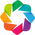

:Overlay
   .Points.I :Points   [invoice_date,pos_id]   (ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,sales_value_Average,Outliers,Score)
   .Curve.I  :Curve   [invoice_date]   (pos_id,ntn,rate_value,sales_value,sales_tax,pos_pass,is_active,invoice_type,consider_for_Annex,month,weekday,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,sales_value_Average,Outliers,Score)

In [ ]:
hv.extension('bokeh')
tooltips = [
    ('Weekday', '@Weekday'),
    ('Day', '@Month_day'),
    ('Month', '@Month'),
    ('Value', '@sales_value'),
    ('Average Value', '@sales_value_Average'),
    ('Outliers', '@Outliers')
]
hover = HoverTool(tooltips=tooltips)

hv.Points(df_hourly.query("Outliers == 1")).opts(size=10, color='#ff0000') * hv.Curve(df_hourly).opts(opts.Curve(title="Restaurant Sales Anomalies", xlabel="", ylabel="Demand" , height=300, responsive=True,tools=[hover,'box_select', 'lasso_select', 'tap'],show_grid=True))

#Trying Prophet Model

Number of rows with missing 'sales_value' values: 0


In [ ]:
# prophet by Facebook
from prophet import Prophet

from sklearn.metrics import mean_absolute_error

In [ ]:
# df["sales_value"]
# Grouping by 'ntn' and counting the occurrences of 'sales_value'
ntn_counts = df.groupby("ntn")['sales_value'].count()

# Getting the 'ntn' values where the count is less than 5
ntn_to_remove = ntn_counts[ntn_counts < 5].index.tolist()

# Filtering the DataFrame to exclude the 'ntn' with counts less than 5
df = df[~df['ntn'].isin(ntn_to_remove)]


In [ ]:
from prophet import Prophet

# Assuming 'invoice_date', 'sales_value', and 'ntn' columns are in the 'df' DataFrame

# Prepare df in Prophet's required format
prophet_data = df.rename(columns={'invoice_date': 'ds', 'sales_value': 'y'})
prophet_data = prophet_data[['ntn', 'ds', 'y']]
prophet_data.set_index("ds")
casting=pd.DataFrame()
# Initialize an empty DataFrame to store anomaly results
anomaly_results = pd.DataFrame(columns=['ntn', 'ds', 'y', 'anomaly'])

# Loop through each unique restaurant ID
    # Subset data for the specific restaurant ID

# Initialize and fit Prophet model for the specific restaurant ID
model = Prophet()
model.add_country_holidays(country_name='Pakistan')
model.fit(prophet_data)

# Make predictions for the specific restaurant
future = model.make_future_dataframe(periods=786)  # Predict for existing df
forecast = model.predict(future)

# Detect anomalies based on forecast for this restaurant
# Detect anomalies based on forecast for this restaurant
forecast['anomaly'] = 0  # Initialize anomaly column

# Adjusted anomaly detection to handle negative and zero sales
# forecast.loc[(forecast['yhat_upper'] < 0) | (forecast['yhat_lower'] <= 0), 'anomaly'] = 1
# Detect anomalies using standard deviation
residuals = prophet_data['y'] - forecast['yhat'].values[:len(prophet_data)]
std_multiplier = 1  # Adjust this value based on sensitivity
std_deviation = np.std(residuals)
anomalies_std = np.array(residuals) > std_multiplier * std_deviation

# Mark the corresponding rows as anomalies
forecast['anomaly'][:len(prophet_data)] = anomalies_std.astype(int)

casting = pd.concat([casting, forecast], axis=0)  # Updated anomaly detection

# Merge anomaly results for this restaurant to the overall results
# anomaly_results = pd.concat([anomaly_results, forecast[['ntn', 'ds', 'y', 'anomaly']]], ignore_index=True)

# Resultant anomaly_results DataFrame will contain the detected anomalies


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo6b18vp/3nwq77pa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoo6b18vp/tn38sz5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27243', 'data', 'file=/tmp/tmpoo6b18vp/3nwq77pa.json', 'init=/tmp/tmpoo6b18vp/tn38sz5e.json', 'output', 'file=/tmp/tmpoo6b18vp/prophet_modelsw7qh1md/prophet_model-20240102140554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:05:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:06:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
casting

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Ashura,Ashura_lower,Ashura_upper,Ashura* (*estimated),...,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,anomaly
0,2022-12-14 00:00:00,513.380,-3611.607,5076.002,513.380,513.380,0.000,0.000,0.000,0.000,...,0.000,0.000,-120.126,-120.126,-120.126,0.000,0.000,0.000,665.508,0
1,2022-12-17 00:00:00,515.378,-3333.771,5446.097,515.378,515.378,0.000,0.000,0.000,0.000,...,0.000,0.000,-6.446,-6.446,-6.446,0.000,0.000,0.000,781.186,0
2,2022-12-18 00:00:00,516.044,-3378.656,5819.609,516.044,516.044,0.000,0.000,0.000,0.000,...,0.000,0.000,262.049,262.049,262.049,0.000,0.000,0.000,1050.347,0
3,2022-12-21 00:00:00,518.042,-3727.336,4862.629,518.042,518.042,0.000,0.000,0.000,0.000,...,0.000,0.000,-120.126,-120.126,-120.126,0.000,0.000,0.000,670.170,0
4,2023-07-16 19:10:57,656.418,-3369.255,5128.426,656.418,656.418,0.000,0.000,0.000,0.000,...,0.000,0.000,326.985,326.985,326.985,0.000,0.000,0.000,830.447,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,2026-01-12 10:24:42,-49854.167,-78515.789,-18282.204,-79429.386,-19206.596,0.000,0.000,0.000,0.000,...,0.000,0.000,8.409,8.409,8.409,0.000,0.000,0.000,-49322.615,1
9825,2026-01-13 10:24:42,-49919.284,-80731.308,-18090.829,-79586.963,-19198.316,0.000,0.000,0.000,0.000,...,0.000,0.000,-171.899,-171.899,-171.899,0.000,0.000,0.000,-49568.040,1
9826,2026-01-14 10:24:42,-49984.400,-79419.597,-19791.198,-79743.378,-19190.036,0.000,0.000,0.000,0.000,...,0.000,0.000,-151.997,-151.997,-151.997,0.000,0.000,0.000,-49613.254,1
9827,2026-01-15 10:24:42,-50049.517,-79233.758,-18298.210,-79899.793,-19151.323,0.000,0.000,0.000,0.000,...,0.000,0.000,-135.273,-135.273,-135.273,0.000,0.000,0.000,-49661.648,1


In [ ]:
casting=casting[["ds","anomaly","yhat_lower","yhat_upper","yhat"]]
df_merged = pd.merge(prophet_data, casting, on='ds')


In [ ]:
df_merged.anomaly.sum()

113

In [ ]:
# df_merged.anomaly.sum()
df_merged[df_merged["anomaly"]==1].sort_values(by="y")

,ntn,ds,y,anomaly,yhat_lower,yhat_upper,yhat
4435,55,2023-11-15 21:32:42,0.000,1,-2578.829,6090.241,1803.976
6832,55,2023-11-15 01:02:07,0.000,1,-2815.156,5755.461,1369.004
2269,55,2023-11-16 13:04:01,0.000,1,-2452.339,6112.039,1666.966
2250,55,2023-11-17 15:24:23,0.000,1,-2677.529,5892.157,1386.319
5898,55,2023-11-22 07:47:13,0.000,1,-3730.302,5498.903,663.066
...,...,...,...,...,...,...,...
6118,108,2023-11-16 20:23:46,5005.000,1,-2628.640,6151.421,1594.333
1250,17,2023-11-15 18:32:00,5725.000,1,-3503.698,5586.563,1055.762
7221,19,2023-11-17 22:21:39,6020.000,1,-2600.565,6067.637,1936.864
7521,68,2023-11-19 23:15:09,8200.000,1,-2136.705,6231.300,1962.176


In [ ]:
df.columns

Index(['srb_invoice_id', 'pos_id', 'ntn', 'name', 'invoice_date', 'invoice_no',
       'rate_value', 'sales_value', 'sales_tax', 'consumer_name',
       'consumer_ntn', 'consumer_address', 'tariff_code', 'extra_info',
       'pos_user', 'pos_pass', 'is_active', 'created_date_time',
       'invoice_type', 'consider_for_Annex', 'month', 'weekday'],
      dtype='object')

In [ ]:
df2=df_merged[["ds","yhat"]]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
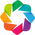

:Layout
   .Curve.I   :Curve   [ds]   (yhat)
   .Curve.II  :Curve   [ds]   (yhat)
   .Curve.III :Curve   [ds]   (yhat)

In [ ]:
hv.extension('bokeh')
Hourly = hv.Curve(df2.set_index('ds').resample('H').mean()).opts(
    opts.Curve(title=" Hourly sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Daily = hv.Curve(df2.set_index('ds').resample('D').mean()).opts(
    opts.Curve(title=" Daily sales of restaurant", xlabel="", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))

Weekly = hv.Curve(df2.set_index('ds').resample('W').mean()).opts(
    opts.Curve(title=" Weekly sales of restaurant", xlabel="Date", ylabel="Demand",
               width=700, height=300,tools=['hover'],show_grid=True))


(Hourly + Daily + Weekly).opts(shared_axes=False).cols(1)

#Moving Average

In [ ]:
def predict_EMA(feature):
  window= 3
  ema = df[feature].ewm(span=window,adjust=False).mean()
  rstd = df[feature].rolling(window=window).std()
  bands = pd.DataFrame()
  bands['invoice_date']=  (df['invoice_date']).copy()
  bands['invoice_date'] = pd.to_datetime(bands['invoice_date'], dayfirst=True)
  bands['ema'] = ema
  bands['lower'] = ema - 2 * rstd
  bands['upper'] = ema + 2 * rstd
  bands = bands.join(df[feature])
  bands = bands.set_index('invoice_date')
  fig = plt.figure(figsize=(20, 6))
  ax = bands.plot(title=feature,  figsize=(20, 6))
  ax.fill_between(bands.index, bands['lower'], bands['upper'], color='#ADCCFF', alpha=0.4)
  ax.set_xlabel('invoice_date')
  ax.set_ylabel(feature)
  ax.grid()
  plt.show()
  return bands

<Figure size 2000x600 with 0 Axes>

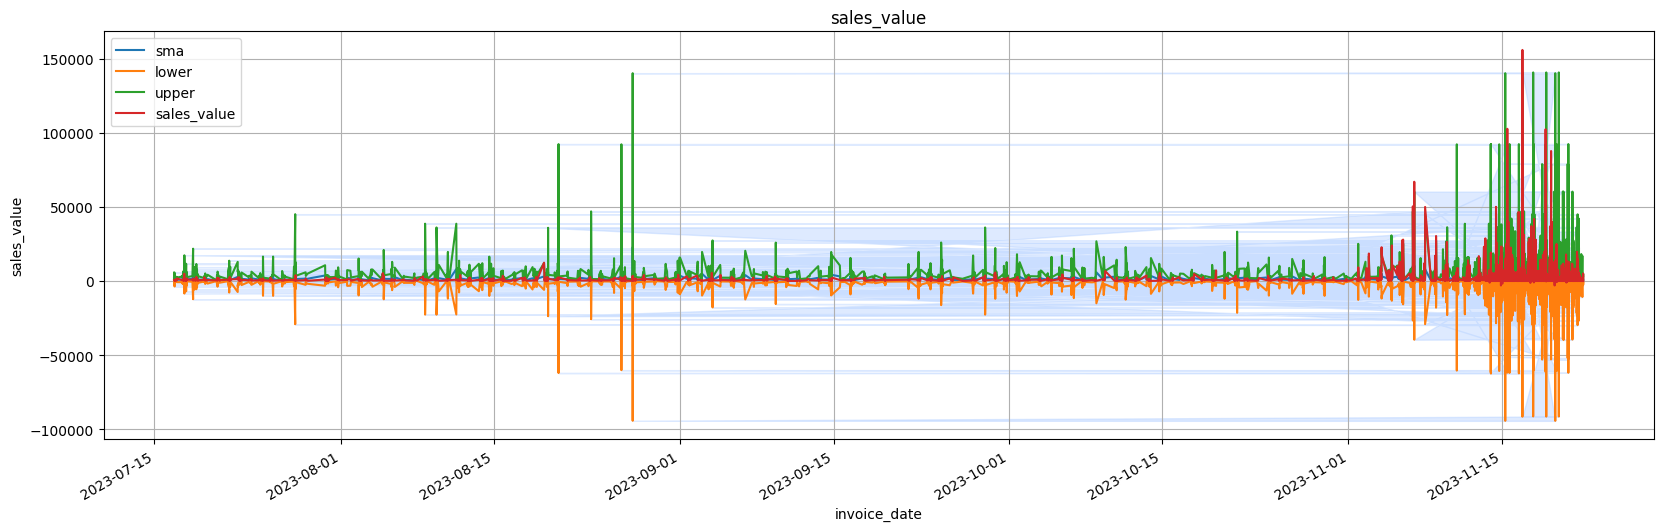

Anamolies for sales_value_SMA values
             invoice_date  sales_value  sales_value_SMA
8    2023-11-19 17:19:55       5605.0      5443.331125
27   2023-11-19 21:49:31       4431.0      4257.448894
34   2023-11-19 21:58:48       2746.0      2654.195728
49   2023-11-16 00:00:00      14060.0     12981.678870
62   2023-11-16 23:11:41      16350.0     14993.933533
...                  ...          ...              ...
9908 2023-11-14 10:38:15       6050.0      5719.389582
9916 2023-11-20 00:23:50       1769.9      1760.573641
9931 2023-11-19 09:33:40       9555.0      8783.236938
9976 2023-11-17 20:06:45       5161.0      4858.559061
9993 2023-11-21 00:11:49       4740.0      4407.728713

[492 rows x 3 columns]


In [ ]:
bands = predict_EMA('sales_value')
bands.reset_index(inplace=True)
max= df['sales_value'].max()
bands['upper'].fillna(max , inplace=True)
df['sales_EMA']= bands['upper'].copy()
print('Anamolies for EMA_Range values\n', df[df['sales_value']>df['sales_EMA']][['invoice_date','sales_value', 'sales_EMA']])

In [ ]:
anomaly['sales_value_anomaly_EMA'][df['sales_value']>df['sales_value_EMA']]= 'anomaly'
anomaly['sales_value_anomaly_EMA'][df['sales_value']<=df['sales_value_EMA']]= ''

 Number of detected anomalies:  1484


,invoice_date,Day,sales_value,Range_anomaly_Prophet,Range_anomaly_Calculated,Range_anomaly_SMA,sales_value_anomaly_SMA,sales_value_anomaly_EMA
3988,2023-09-19 17:13:49,Tuesday,132.740005,132.740005,,132.740005,,anomaly
5654,2023-11-10 13:29:46,Friday,238.940000,238.940000,,238.940000,,anomaly
6395,2023-11-20 15:41:34,Monday,292.040009,292.040009,,292.040009,,anomaly
6825,2023-10-19 20:00:50,Thursday,354.000000,354.000000,,354.000000,,anomaly
6603,2023-09-19 16:40:58,Tuesday,398.239990,398.239990,,398.239990,,anomaly
8610,2023-11-19 20:43:00,Sunday,533.280000,533.280000,,533.280000,,anomaly
9166,2023-11-17 01:41:56,Friday,557.520000,557.520000,,557.520000,,anomaly
6823,2023-11-16 07:46:57,Thursday,565.000000,565.000000,,565.000000,,anomaly
3609,2023-08-04 21:10:57,Friday,566.390015,566.390015,,566.390015,,anomaly
8405,2023-11-19 18:38:50,Sunday,584.080017,584.080017,,584.080017,,anomaly


#clustering

In [85]:
from sklearn.cluster import KMeans
numeric_Cols=['pos_id', 'ntn', 'sales_value', 'is_active', 'consider_for_Annex',"consumer_name","consumer_address","weekday"]
numeric_data = df2[numeric_Cols]

# Handling missing values if any
numeric_data.fillna(0, inplace=True)  # Fill NaN or missing values with 0, this can vary based on your df

# Using KMeans clustering with, say, 3 clusters
kmeans = KMeans(n_clusters=7)
df2['cluster'] = kmeans.fit_predict(numeric_data)

# Printing the count of points in each cluster
print(df2['cluster'].value_counts())


0    7685
5    1898
3     335
1      68
6      10
2       3
4       1
Name: cluster, dtype: int64


In [39]:
for i in range(0,7):
  print(df[df.cluster==i].ntn.value_counts())
  print("----------")

55     2072
161    1687
219    1153
200     261
220     192
       ... 
147       1
146       1
12        1
37        1
177       1
Name: ntn, Length: 180, dtype: int64
----------
56    1
53    1
43    1
Name: ntn, dtype: int64
----------
68     86
99     36
19     21
85     13
137    10
       ..
23      1
22      1
115     1
103     1
157     1
Name: ntn, Length: 81, dtype: int64
----------
161    264
219    233
55     196
163     87
68      79
      ... 
211      1
190      1
187      1
243      1
143      1
Name: ntn, Length: 164, dtype: int64
----------
68     22
99      6
43      3
53      2
165     2
86      2
173     2
28      2
162     1
179     1
129     1
30      1
214     1
50      1
201     1
205     1
108     1
220     1
122     1
113     1
126     1
157     1
141     1
4       1
56      1
90      1
118     1
6       1
194     1
246     1
19      1
146     1
171     1
137     1
Name: ntn, dtype: int64
----------
68    1
Name: ntn, dtype: int64
----------
68     4
144    1

In [89]:
from scipy.spatial.distance import euclidean
import numpy as np

# Calculate the centroids of each cluster
cluster_centroids = df2.groupby('cluster').mean()
df2=df2[['cluster']+numeric_Cols]
# Calculate the distance of each point from its respective cluster centroid
distances = []
for i in range(len(df2)):
    cluster_num = df2.loc[i, 'cluster']
    centroid = cluster_centroids.loc[cluster_num]
    point = df2.loc[i, numeric_Cols]
    distance = euclidean(point, centroid)
    distances.append(distance)

df2['distance_from_centroid'] = distances

# Set a threshold for anomaly detection (e.g., points beyond 3 standard deviations)
threshold = np.mean(df2['distance_from_centroid']) + 3 * np.std(df2['distance_from_centroid'])

# Find anomalies (points beyond the threshold)
anomalies = df2[df2['distance_from_centroid'] > threshold]

# Output anomalies
print(anomalies)


      cluster  pos_id  ntn   sales_value  is_active  consider_for_Annex  \
49          1     490   53  14060.000000          1                   1   
62          1     704  165  16350.000000          1                   1   
340         3      49   68  10860.000000          1                   1   
815         3     490   53  13380.000000          1                   1   
846         6     969  144  36980.000000          1                   1   
...       ...     ...  ...           ...        ...                 ...   
9468        1     103  108  14125.000000          1                   1   
9567        1      63  220  15398.290000          1                   1   
9632        3     143  161   5292.100098          1                   1   
9697        3      49   68  10940.000000          1                   1   
9772        3     711   81  13030.000000          1                   1   

      consumer_name  consumer_address  weekday  distance_from_centroid  
49                1       

In [91]:
anomalies.sort_values(by="sales_value")

,cluster,pos_id,ntn,sales_value,is_active,consider_for_Annex,consumer_name,consumer_address,weekday,distance_from_centroid
6328,0,396,219,-3008.850000,1,1,0,0,1,3621.408214
3987,0,343,75,-2999.000000,1,0,0,0,6,3611.799174
9632,3,143,161,5292.100098,1,1,0,1,4,2557.868251
4549,3,610,22,5301.000000,1,1,1,0,4,2550.298002
7362,3,31,19,5310.000000,1,1,1,0,4,2552.983830
...,...,...,...,...,...,...,...,...,...,...
5194,6,49,68,50400.000000,1,1,0,0,0,4412.425775
7569,6,49,68,67000.000000,1,1,0,0,1,20998.826968
7291,2,561,43,87751.000000,1,1,1,0,6,9903.911163
5266,2,490,53,102450.000000,1,1,1,0,6,4795.830632


In [92]:
df.sort_values(by="sales_value")

,srb_invoice_id,pos_id,ntn,name,invoice_date,invoice_no,rate_value,sales_value,sales_tax,consumer_name,...,extra_info,pos_user,pos_pass,is_active,created_date_time,invoice_type,consider_for_Annex,month,weekday,cluster
6328,396231114221028018,396,219,Hunter Ortiz,2023-11-14 22:10:28,0069-904-244931,13.0,-3008.85,-391.15,0,...,0.0,NaN,NaN,1,2023-11-14 22:24:46,3.0,1,11,1,5
3987,3432023112003300257,343,75,Thomas Padilla,2023-11-19 19:45:58,1911231945590650,13.0,-2999.00,-345.00,0,...,0.0,7930868,NaN,1,2023-11-20 03:30:02,2.0,0,11,6,5
8434,477231115011150310,478,219,Hunter Ortiz,2023-11-15 01:11:50,0187-1059-210982,13.0,-1823.01,-236.99,0,...,0.0,NaN,NaN,1,2023-11-15 13:06:29,3.0,1,11,2,5
8212,380231117144022976,380,219,Hunter Ortiz,2023-11-17 14:40:22,0075-937-321665,13.0,-1283.19,-166.81,0,...,0.0,NaN,NaN,1,2023-11-18 08:42:13,3.0,1,11,4,5
8433,477231113212417298,479,219,Hunter Ortiz,2023-11-13 21:24:17,0187-802-155025,13.0,-1106.19,-143.81,0,...,0.0,NaN,NaN,1,2023-11-14 12:31:22,3.0,1,11,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7569,49231107001551448,49,68,Aurora Ali,2023-11-07 00:15:51,92198,13.0,67000.00,8710.00,0,...,0.0,NaN,NaN,1,2023-11-14 03:15:41,1.0,1,11,1,6
7291,56120231119182621,561,43,John Moore,2023-11-19 12:00:00,A0088262,13.0,87751.00,11407.50,1,...,0.0,NaN,NaN,1,2023-11-19 18:34:42,1.0,1,11,6,3
5266,491231119203323264,490,53,Peyton Huang,2023-11-19 00:00:00,20231119-SAK-69329,13.0,102450.00,13318.50,1,...,0.0,NaN,NaN,1,2023-11-19 20:45:43,1.0,1,11,6,3
2748,670231116000721039,670,56,Piper Lewis,2023-11-15 12:07:00,19716,13.0,102763.70,13359.28,0,...,0.0,NaN,NaN,1,2023-11-16 12:31:08,1.0,1,11,2,3
